<a href="https://colab.research.google.com/github/nabuulek/Data-analysis-projects/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#we need to look at the data and understand what we need to do
import pandas as pd #for data manipulation and analysis
data = pd.read_excel("/content/customer_segmentation.xlsx")
data.head(5)

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [2]:
#lets get some more insights from this data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [3]:
#from that we notice that we have some missing values in the defaulted column and as well some unnecessary columns

#deleting the unnamed:0 column
del data["Unnamed: 0"]

#setting customer id to the index
data.set_index("Customer Id")

#replacing the missing values in the defaulted column with mode
data["Defaulted"] = data['Defaulted'].fillna(data['Defaulted'].mode()[0])

In [4]:
#we check whether all our changes have been effected
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        850 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
#we're moving to the next step of intoducing the k-means clustering algorithm

#since our data is to be used for ML and k-meeans uses a distance metric we need to standardize
#import the library
from sklearn.preprocessing import StandardScaler

#instantiate the standard scalar
scaler = StandardScaler()

#fit and transform the data
scaled_data = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

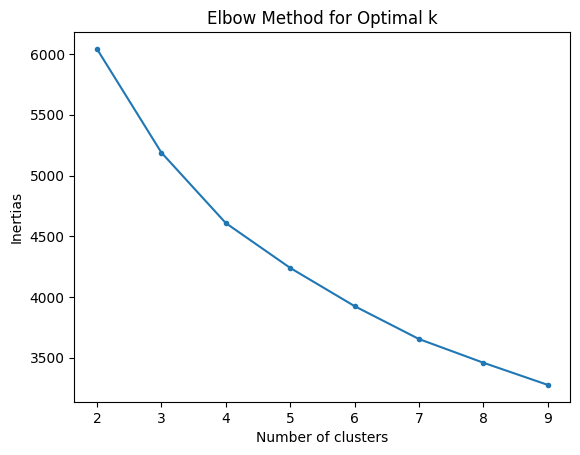

In [6]:
#for k-means clustering we need to choose the best number of clusters
#we are going to check the inertia elbow plot and check for the best number of clusters

#we need to import the necessary libraries and packages
import numpy as np #for any numerical calcualtions eg no. of clusters, cluster centroids
import matplotlib.pyplot as plt #for data visualization
from sklearn.cluster import KMeans

#create an empty list of inertias
inertias = []

#we loop through values between the range of 2 and 10
for k in range(2,10):
  #we initaialize KMeans with the current k value
  kmeans = KMeans(n_clusters=k)
  #fit kmeans to the data
  kmeans.fit(scaled_data)
  #append inertias to the set
  inertias.append(kmeans.inertia_)

#we visualize the scores on the elbow plot
plt.plot(range(2,10), inertias, marker = '.')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.title('Elbow Method for Optimal k')
plt.show


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

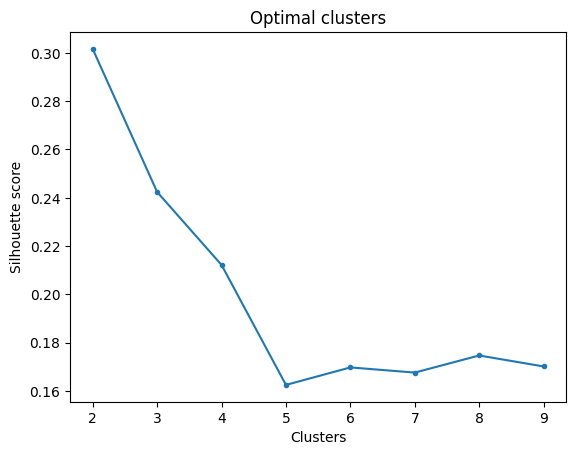

In [7]:
#we notice that from the elbow plot shows that the graph stops to level off at 3 but also at 4
#we need to further assess this using the silhoutte score to check what method is more accurate

#let's visaualize the silhoutte scores

#we need to first import the necessary library
from  sklearn.metrics import silhouette_score
#store silhouette scores in a list
silhouette_scores = []
#loop through each of the values in the range of 2 to 10
for n in range(2,10):
  #initialize the kmeans on the current n
  kmeans = KMeans(n_clusters=n)
  #fit the model to the data
  kmeans.fit(scaled_data)
  #append silhouette scores to the list
  silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

#visualizing the plot
plt.plot(range(2,10), silhouette_scores, marker = '.')
plt.xlabel('Clusters')
plt.ylabel('Silhouette score')
plt.title('Optimal clusters')
plt.show()

From our plot, we see that 2 clusters have the highest silhouette score so we choose that for clustering.

In [8]:
#we now model kmeans but considering 2 clusters
kmeans2 = KMeans(n_clusters=2)
#fitting kmeans to the scaled data
kmeans2.fit(scaled_data)

#we now create a cluster labels column for the data set
#but first fit the model to the data and predict the cluster labels
cluster_label = kmeans2.fit_predict(scaled_data)
#assign the cluster labels to the new column of cluster labels
data["cluster"] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


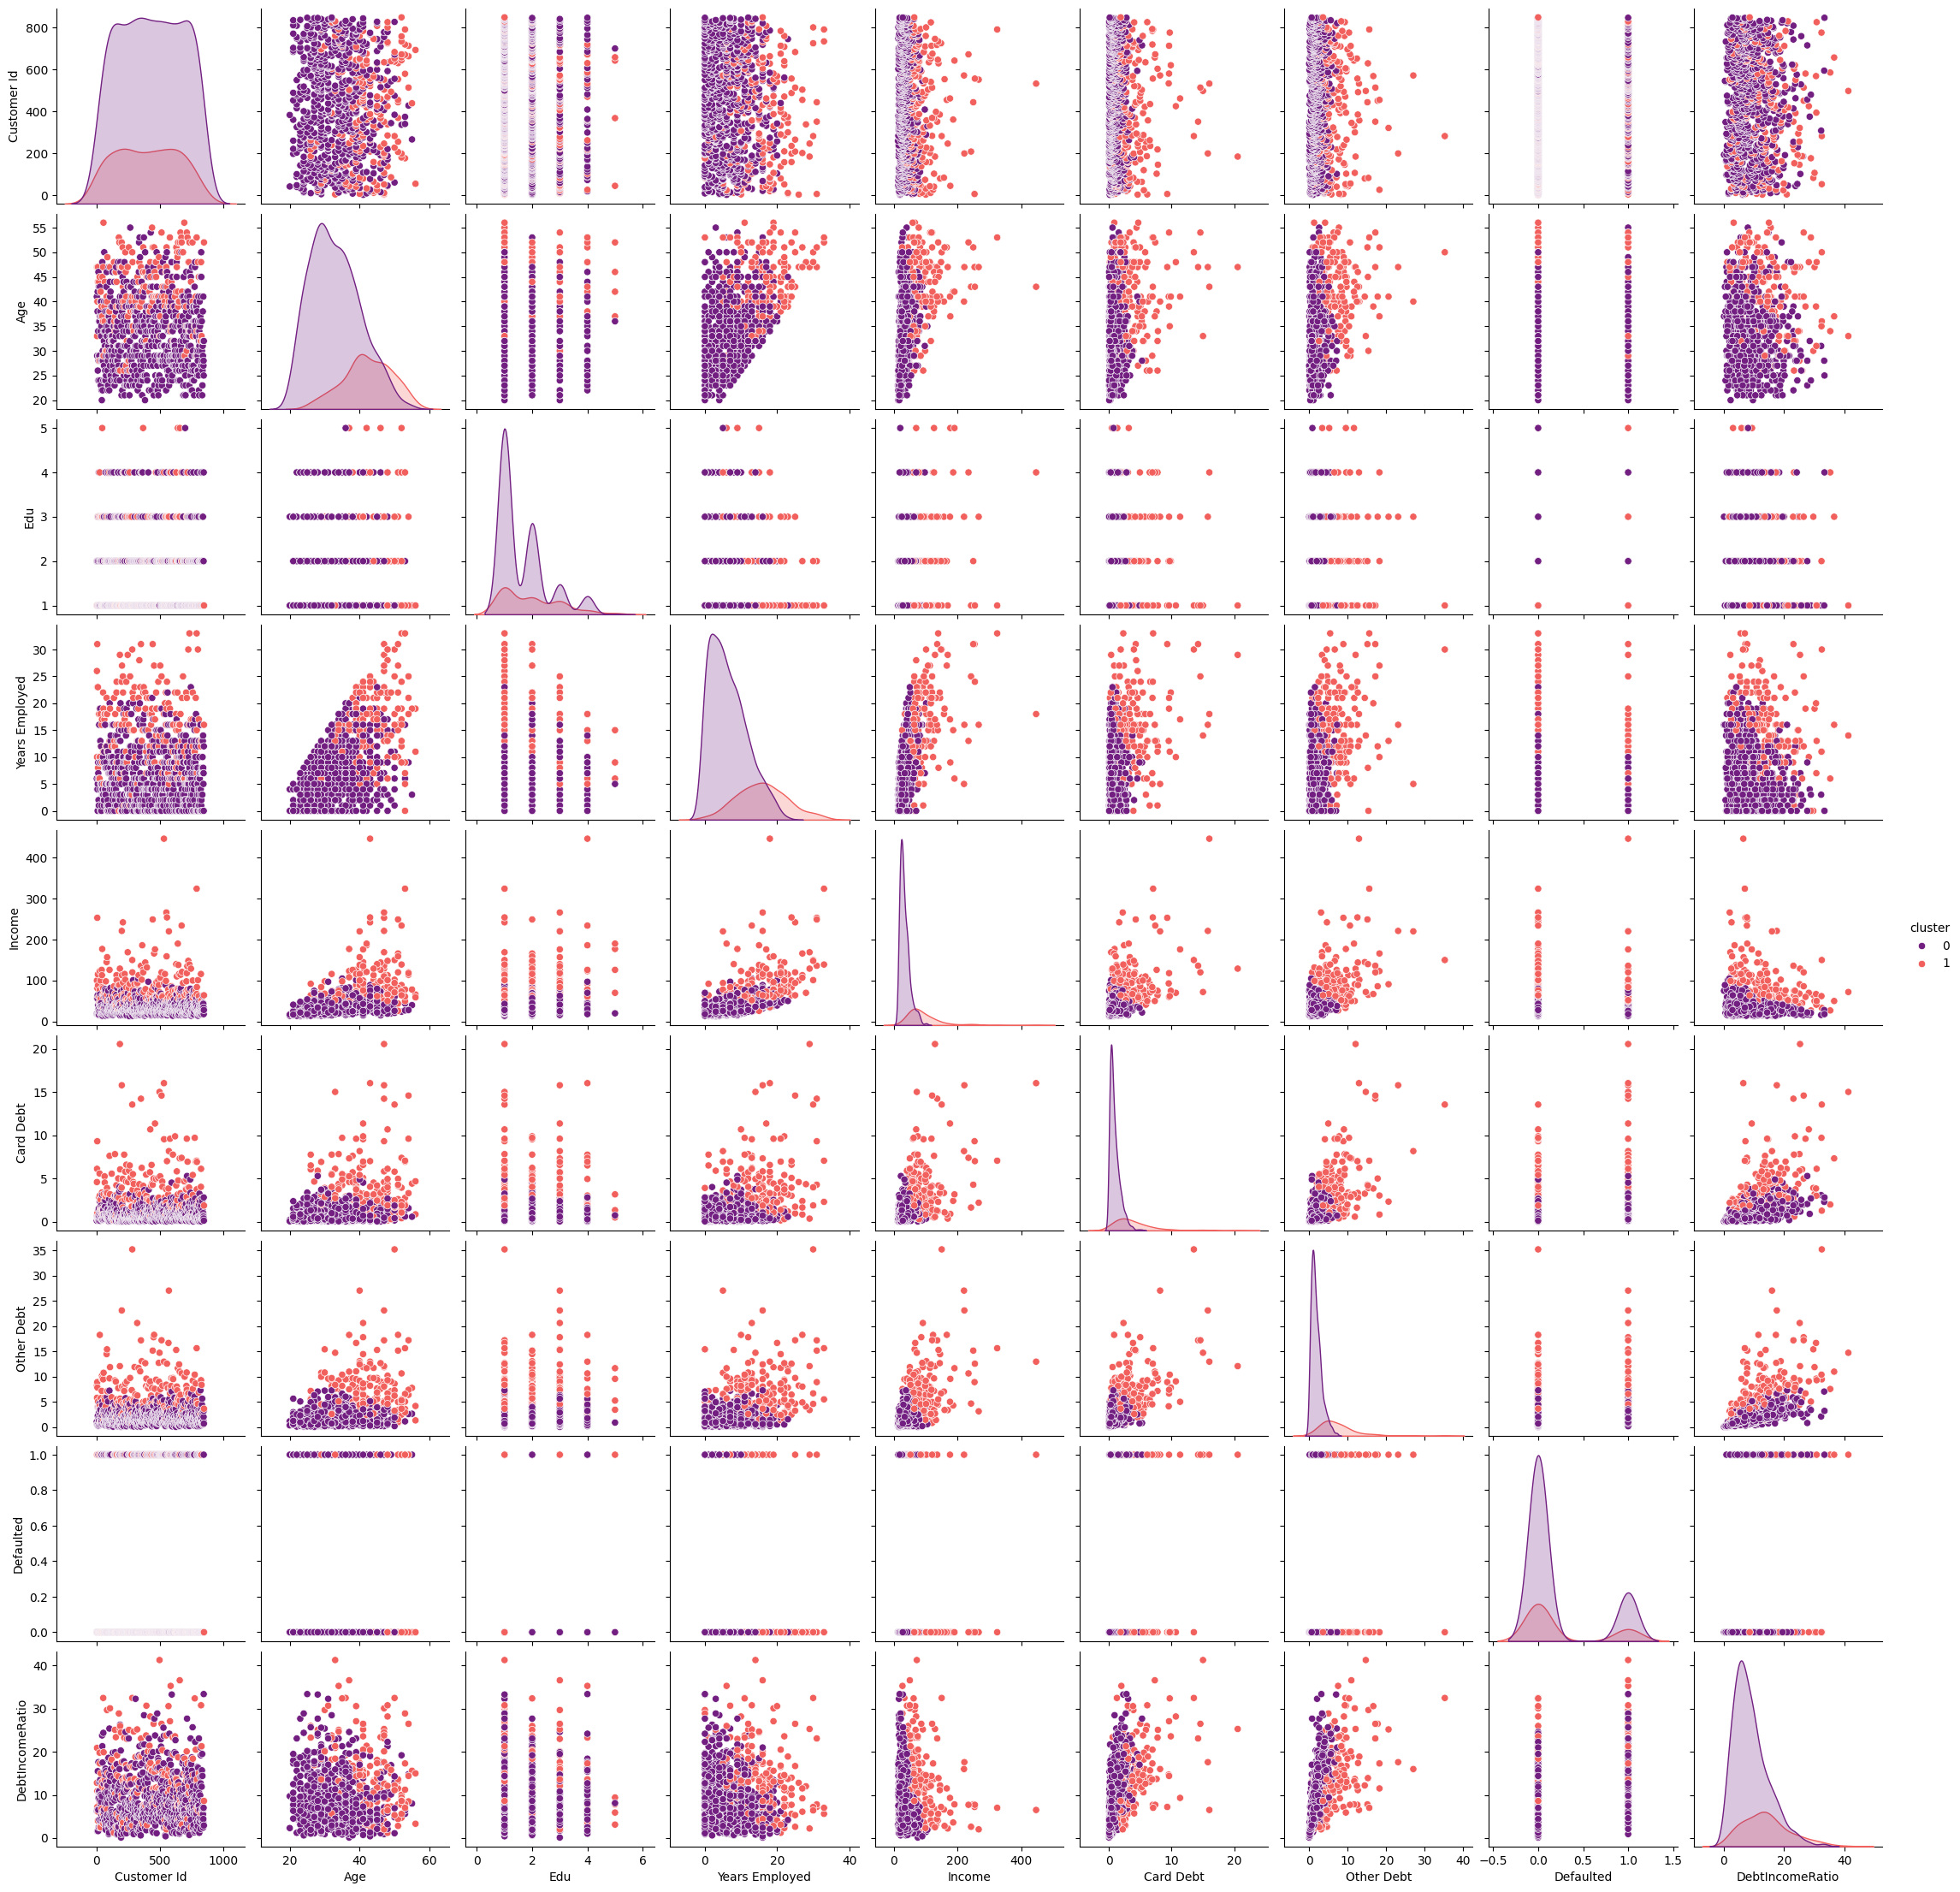

In [10]:
#we would wish to see the relationship between pairs of variables in our data
#we create pairplots in this case, but first import the seaborn library
import seaborn as sns
#creating pairplots
sns.pairplot(data=data, hue="cluster", palette="magma")
#displaying the plot
plt.show()

<ipython-input-15-121330ff0fff>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=data, palette='magma', ax=axes[idx])
<ipython-input-15-121330ff0fff>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=data, palette='magma', ax=axes[idx])
<ipython-input-15-121330ff0fff>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=data, palette='magma', ax=axes[idx])
<ipython-input-15-121330ff0fff>:14: FutureWarning: 

Passing `palette` without assigning `hue` is depre

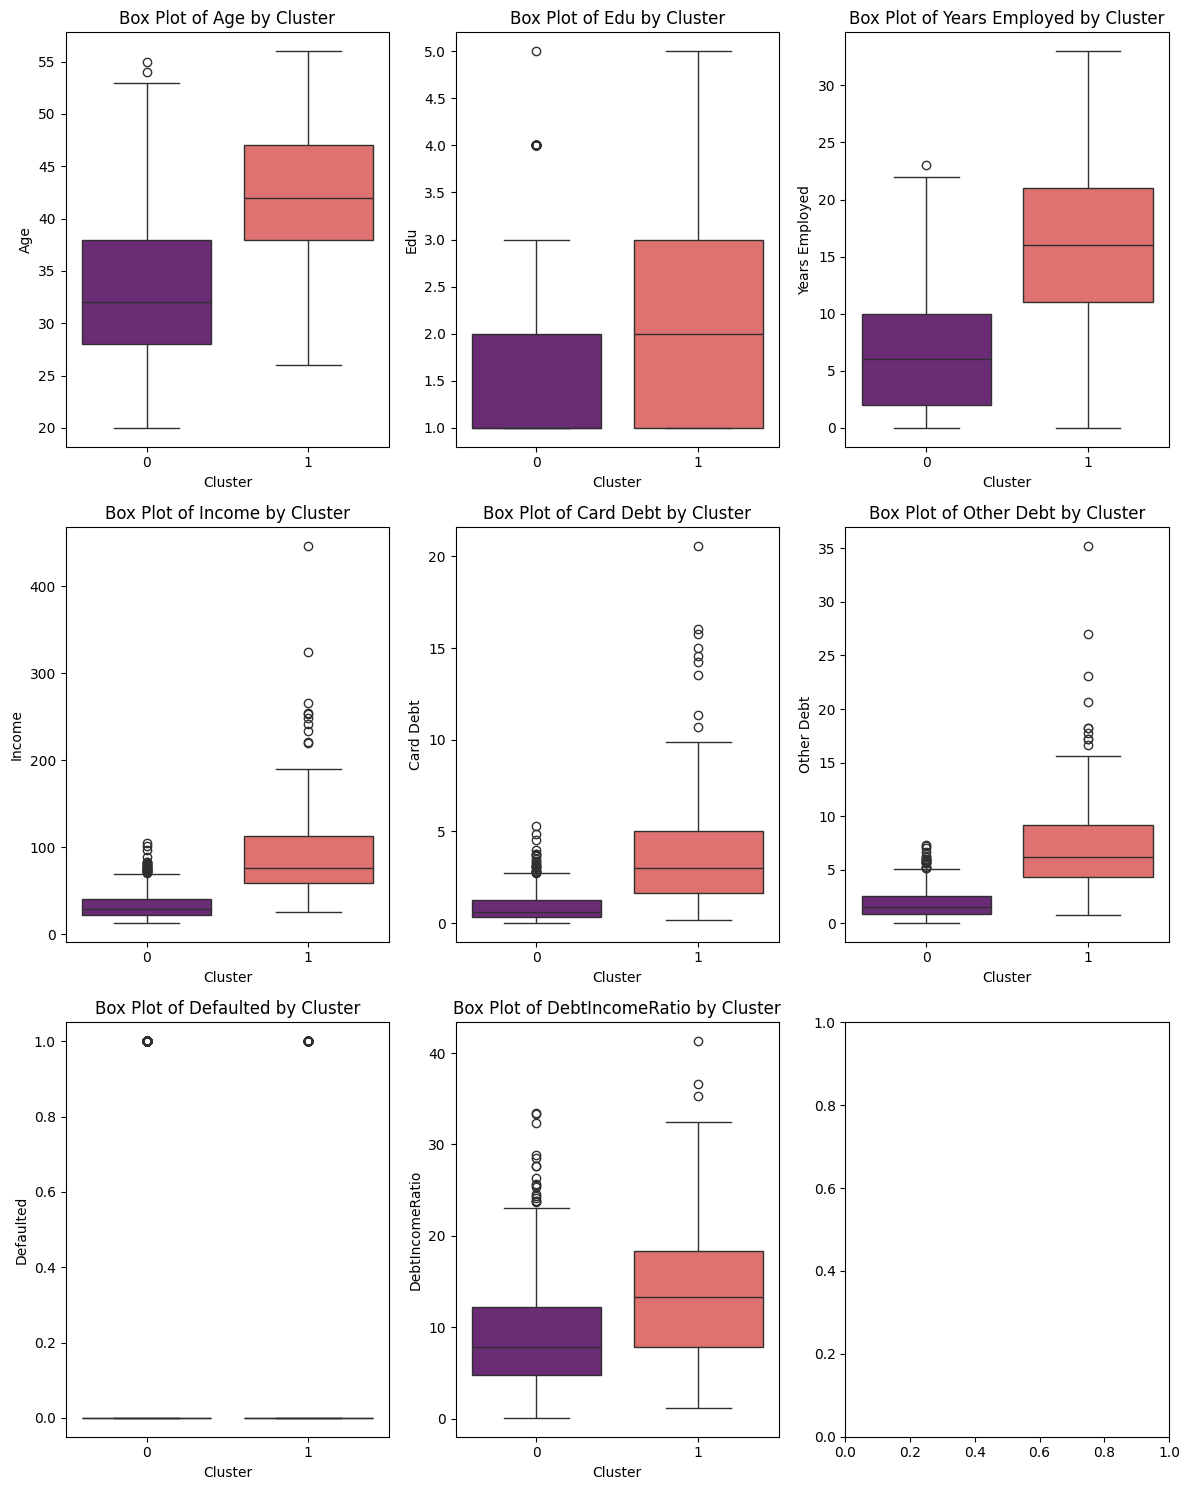

In [15]:
#since our interest is to get inisghts about this data, we need find out what their characteristics are
#in this case we are going to use box plots to find out those characteristics

# Calculate the number of rows needed for the subplots
num_rows = (len(data.columns[:-1]) + 2) // 3  # Round up the division result

# Create subplots with 3 columns and dynamic number of rows
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, num_rows * 5))

# Flatten axes for easier iteration
axes = axes.flatten()

for idx, feature in enumerate(data.columns[1:-1]):#we exclude first column (customer_id and the cluster column
    sns.boxplot(x='cluster', y=feature, data=data, palette='magma', ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {feature} by Cluster')
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(feature)

# Hide empty subplots if any
for ax in axes[len(data.columns[:-1]):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [17]:
#from the plot above, we notice that we can distinguish the clusters based on available charactreristics
#we need real values though

#we get the mean values for the attributes grouped by cluster and eliminating the first column, customer id
data.groupby(['cluster'])[[x for x in list(data.columns)[1:]]].mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
cluster,,,,,,,,,
0,32.977307,1.638427,6.487141,33.464448,0.903437,1.869381,0.207262,9.023147,0.0
1,42.206349,1.962963,15.835979,92.878307,3.931878,7.308444,0.243386,14.188360,1.0


The values from the data frame above look similar to the interpretation from the visuals.

**INTERPRETATION OF CLUSTERS**

**Cluster 0:**
Individuals in ths cluster are younger with an average age of 32 years, less educated, have less than 7 years of employment on average. Their income is lower, low card debt (0.9), and have low values of other debet and debt income ratio as well.

**Cluster 1:**
These individuals are generally older(42 years) and slightly more educated(1.95 years), they have woked for more years(16 years) and have higher income(95.4) than cluster 0.They have more debt and a greater debtIncomeratio.

***RECOMMENDATIONS ***

Cluster 0:

More education and sensitization on use of credit cards

Provide cards with low limits

Cluster 1:

Offer credit cards with exclusive benefits eg platinum, express or gold cards with benefits such as cashback rewards and travel perks

Give them personalised date repayment strategies and offers eg 0.5% reduction for debt repayment in 1 year
